In [64]:
import pandas as pd
from pandas import DataFrame

df: DataFrame = pd.read_csv('../datasets/csv/HaLT-SubjectI-160628-6St-LRHandLegTongue_experiment_2.csv')


In [65]:
df = df.sort_values(by=df.columns[0])
df = df.drop(df.columns[0], axis=1)
df.head()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,Marker
0,-68.77,-98.56,-24.21,-19.92,0.71,-0.73,2.99,-5.45,-1.47,-39.85,...,-19.22,3.51,12.47,8.20,-10.06,-28.82,-6.15,-3.34,0.37,0
1,-63.30,-92.16,-21.11,-19.05,3.53,-2.26,4.22,-7.97,-0.72,-41.01,...,-18.81,5.96,11.73,11.53,-10.75,-27.09,-5.96,-4.33,-0.38,0
2,-60.23,-87.34,-17.81,-17.12,3.74,-2.03,4.03,-7.00,-0.76,-41.87,...,-16.76,10.61,12.34,12.86,-10.93,-24.11,-4.57,-4.14,-0.19,0
3,-57.43,-88.88,-17.26,-17.45,1.83,-1.48,4.42,-3.67,2.58,-36.68,...,-16.17,10.93,11.73,13.77,-9.02,-25.05,-5.14,-1.68,-0.28,0
4,-59.40,-87.15,-19.96,-18.07,1.69,0.66,6.99,1.29,7.15,-31.57,...,-16.65,9.15,9.90,15.86,-6.57,-26.12,-5.23,2.45,-0.07,0


<Axes: >

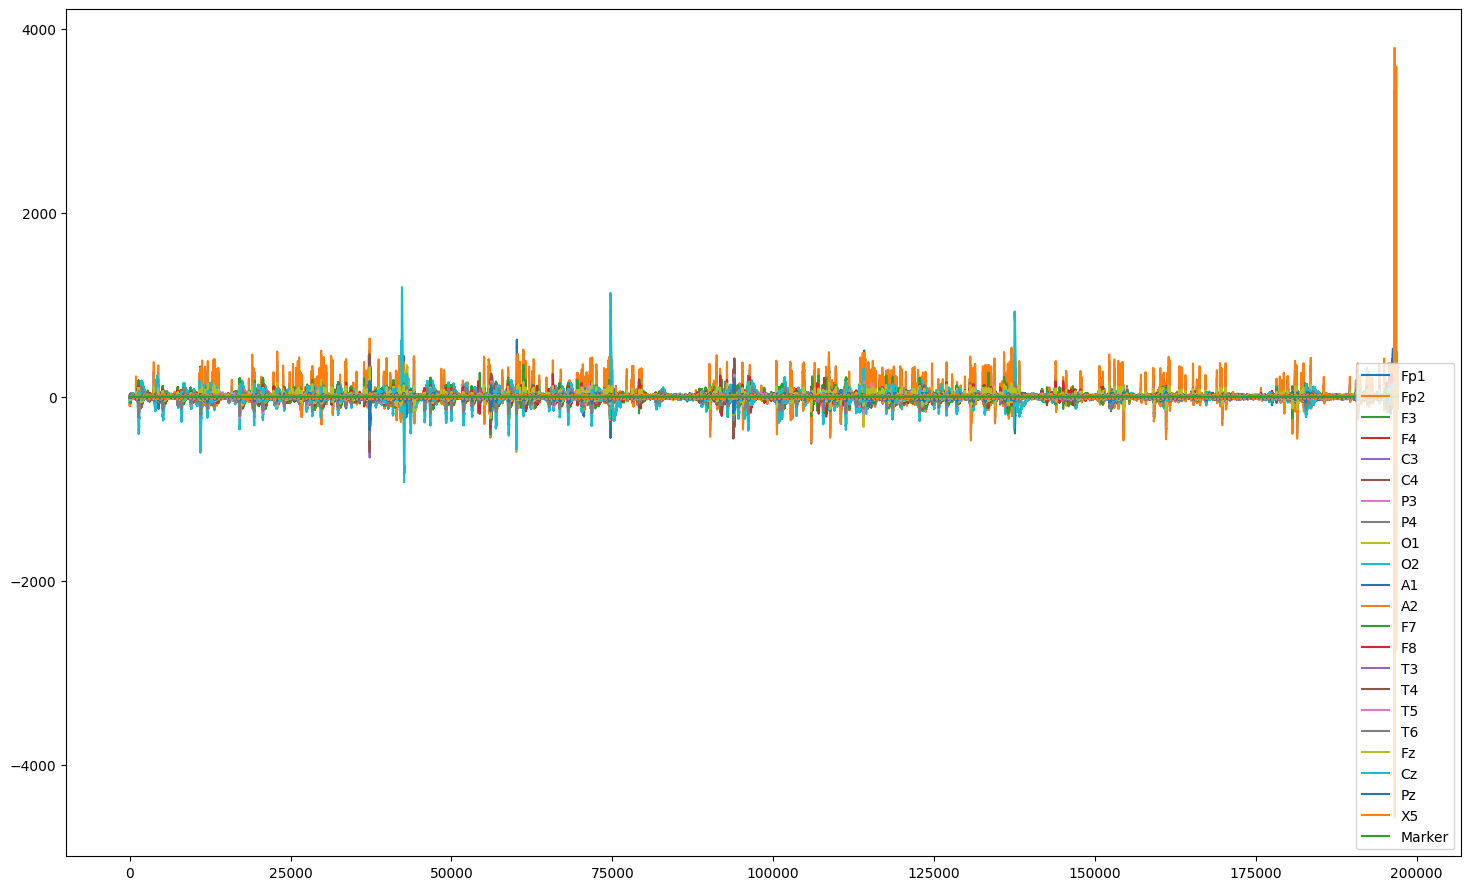

In [66]:
df[].plot(kind='line', figsize=(18,11))

In [67]:
import numpy as np

print(np.unique(df['Marker']))

[ 0  1  2  3  4  5  6 92]


In [68]:
def print_imbalance(df):
    class_counts = df['Marker'].value_counts().sort_index()
    total_examples = sum(class_counts)

    # Proportion of classes
    for idx in class_counts.index:
        print(f'Class {idx}: {class_counts[idx]} samples; {class_counts[idx]/total_examples *100}%')

    # Rho balancing value for the dataset:
    # From: Buda, M., Maki, A., & Mazurowski, M. A. (2018). A systematic study of the class imbalance problem in convolutional neural networks. Neural Networks, 106, 249–259. https://doi.org/10.1016/j.neunet.2018.07.011


    rho = class_counts[np.argmax(class_counts)] / class_counts[np.argmin(class_counts)] 
    print(f'\nDataset Rho value: {rho}')

print_imbalance(df)

Class 0: 132782 samples; 67.37193537911999%
Class 1: 12411 samples; 6.297187043351194%
Class 2: 10168 samples; 5.159116739730476%
Class 3: 10378 samples; 5.265668127942848%
Class 4: 8949 samples; 4.540611300535801%
Class 5: 10182 samples; 5.1662201656113%
Class 6: 12011 samples; 6.094232018184771%
Class 92: 207 samples; 0.10502922552362397%


KeyError: 7

In [53]:
# Undersample majority class

print(len(np.unique(df['Marker'])))

majority_samples = len(df.loc[df['Marker'] == 0])
majority_ratio = majority_samples/(len(df)*len(np.unique(df['Marker'])))

print(f'Majority ratio: {majority_ratio}')

7
Majority ratio: 0.09445652254565151


In [61]:
sample = df.loc[df['Marker'] == 0].sample(frac=majority_ratio)
print(sample)
df_test = df.loc[df['Marker'] != 0]
print(df_test)
df_test = sample.combine_first(df_test)


print(df_test)

          Fp1   Fp2    F3    F4    C3    C4    P3    P4    O1    O2  ...  \
5638    -5.45 -0.96 -1.72 -4.00 -0.30  0.49  1.68  3.08  1.26  2.96  ...   
22017   -4.11  1.29 -0.76  1.44 -1.31  2.25 -1.93 -1.79 -2.33 -2.42  ...   
178528   8.01  3.58  7.51 -2.16  6.11 -6.00  3.55 -2.28  3.40 -3.69  ...   
105545 -11.58 -7.53 -2.88  1.86 -5.10  6.20 -2.11  2.39 -1.85  1.35  ...   
56345    5.87  6.42  3.99 -0.38  1.51 -0.13 -5.26 -5.12 -6.06 -6.42  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
189663  -0.09 -0.12  2.32 -0.90  3.06 -2.24 -2.57 -7.31 -5.19 -8.34  ...   
142016 -12.78 -9.55 -3.20 -2.12 -0.88  0.78  0.13 -4.36 -0.69 -3.10  ...   
72869    2.33  0.85  1.35  2.01  0.24 -0.22 -2.53  0.08 -3.54  0.08  ...   
30789   -1.41 -1.91  2.82  2.63 -0.37  1.93 -4.61 -2.92 -5.87 -3.10  ...   
55533   -5.70  2.19 -3.77  6.52 -4.83  3.52 -6.70 -1.66 -7.78 -1.77  ...   

          F8     T3    T4     T5     T6    Fz    Cz    Pz    X5  Marker  
5638   -4.42 

<Axes: >

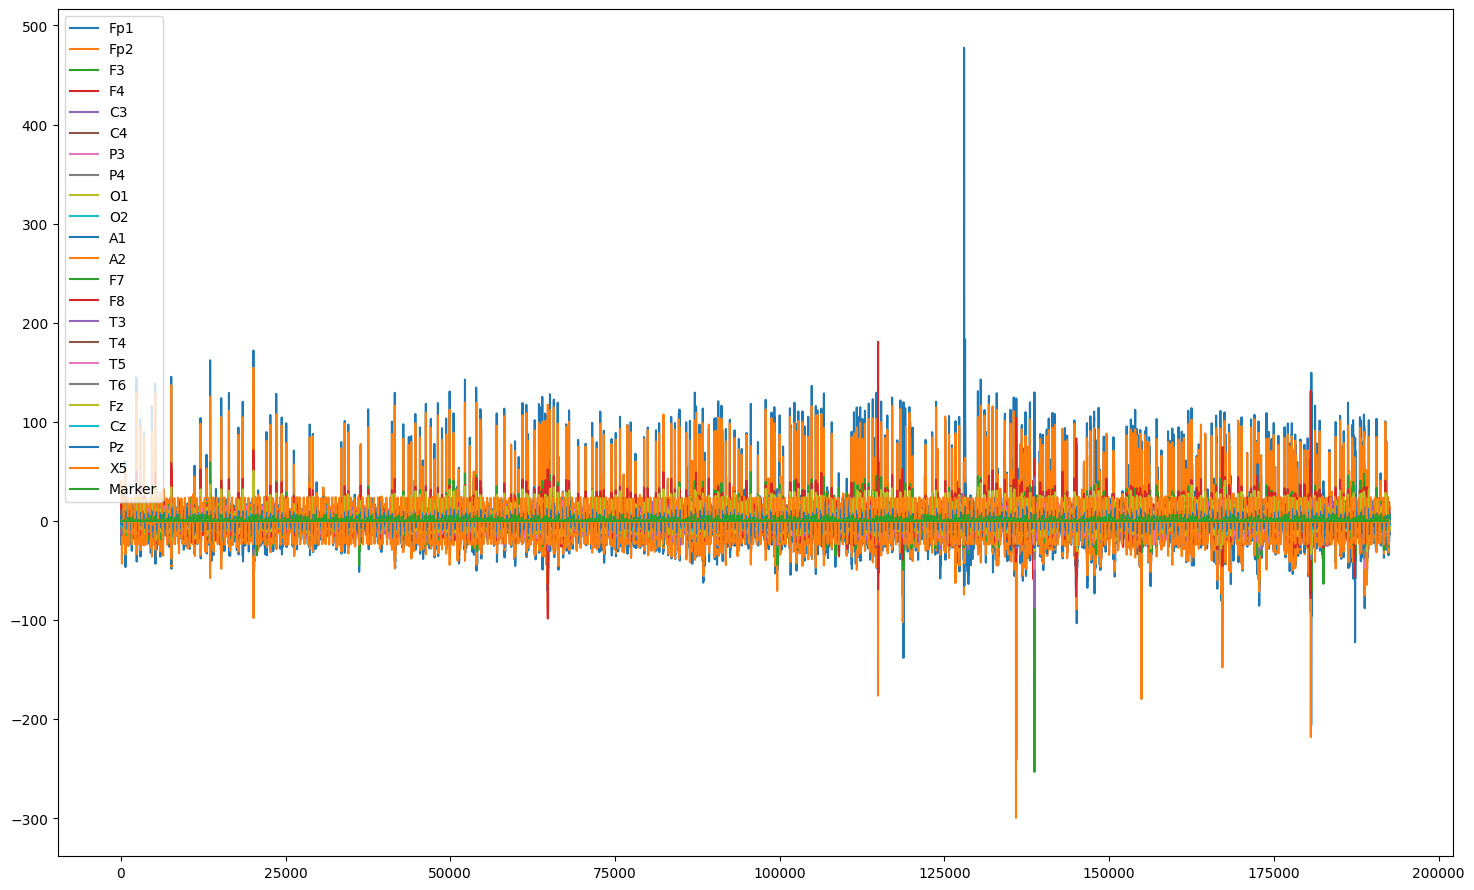

In [62]:
df_test.plot(kind='line', figsize=(18,11))

In [63]:
print_imbalance(df_test)

Class 0: 12024 samples; 15.564242628213426%
Class 1: 11830 samples; 15.313122945090221%
Class 2: 11014 samples; 14.2568669583452%
Class 3: 10194 samples; 13.195433246174955%
Class 4: 9586 samples; 12.40841898154141%
Class 5: 12827 samples; 16.603671007326483%
Class 6: 9779 samples; 12.658244233308308%

Dataset Rho value: 1.3380972251199665
